In [1]:
import scanpy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn as sns
import bbknn

In [2]:
import sys
sys.path.insert(0, "../lib")
import sc_utils

In [4]:
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["figure.figsize"] = (8, 8)
pd.set_option('display.max_rows', 500)

In [4]:
ds_full = sc.read_h5ad("../data/02dataset/integrated-manual.h5ad")

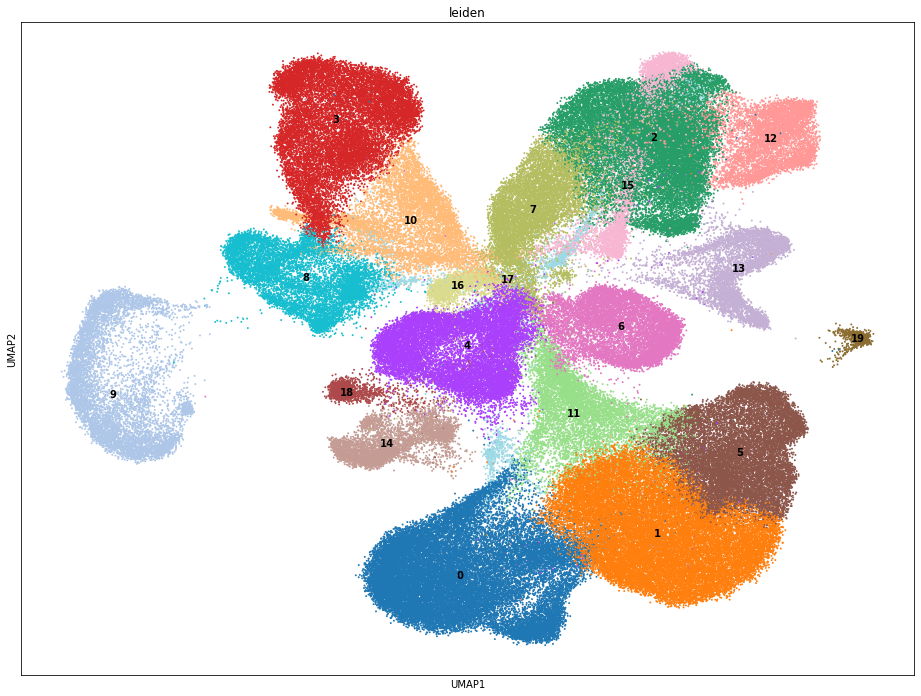

In [5]:
sc.pl.umap(ds_full, color="leiden", size=15, legend_loc="on data")

## Subset only on Immune clusters

In [6]:
immune_clusters = ["0", "1", "5", "6", "11", "14", "18", "19"]

In [7]:
ds = ds_full[ds_full.obs.leiden.isin(immune_clusters), :].copy()

In [8]:
ds.obs["COVID-19"] = ds.obs["COVID-19"].astype("category")

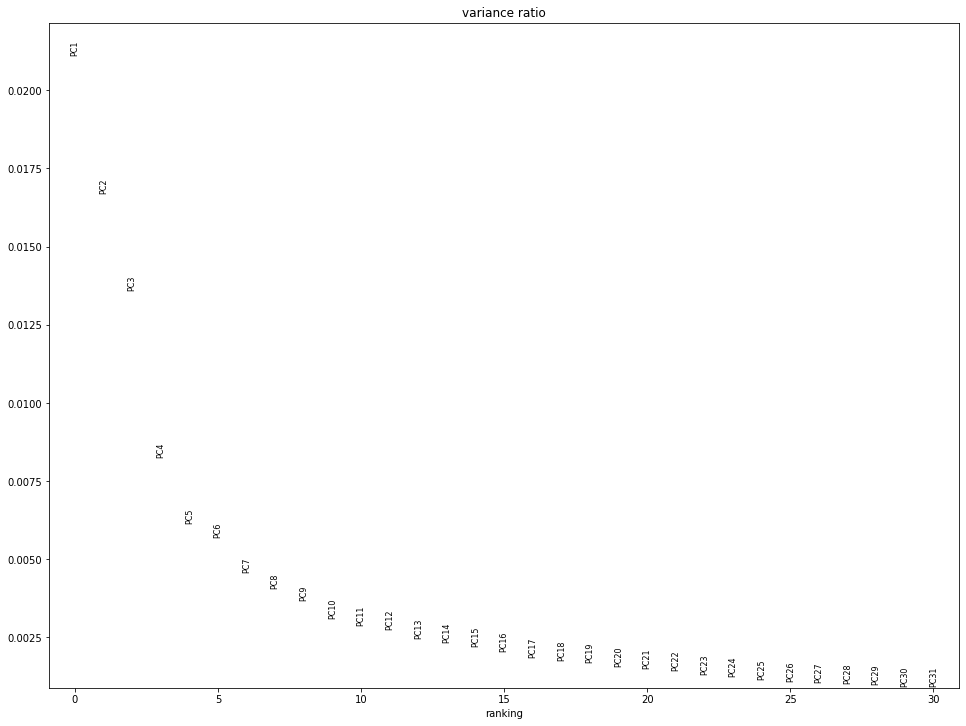

In [9]:
ds = ds.raw.to_adata()
sc.pp.highly_variable_genes(ds, n_top_genes=3000, batch_key="orig.ident")
ds.raw = ds

sc.pp.scale(ds)
sc.tl.pca(ds, svd_solver="arpack")
sc.pl.pca_variance_ratio(ds)

In [10]:
bbknn.bbknn(ds, neighbors_within_batch=int(50 / ds.obs.batch.unique().size), n_pcs=25)

In [11]:
sc.tl.leiden(ds, resolution=0.5)
sc.tl.umap(ds)

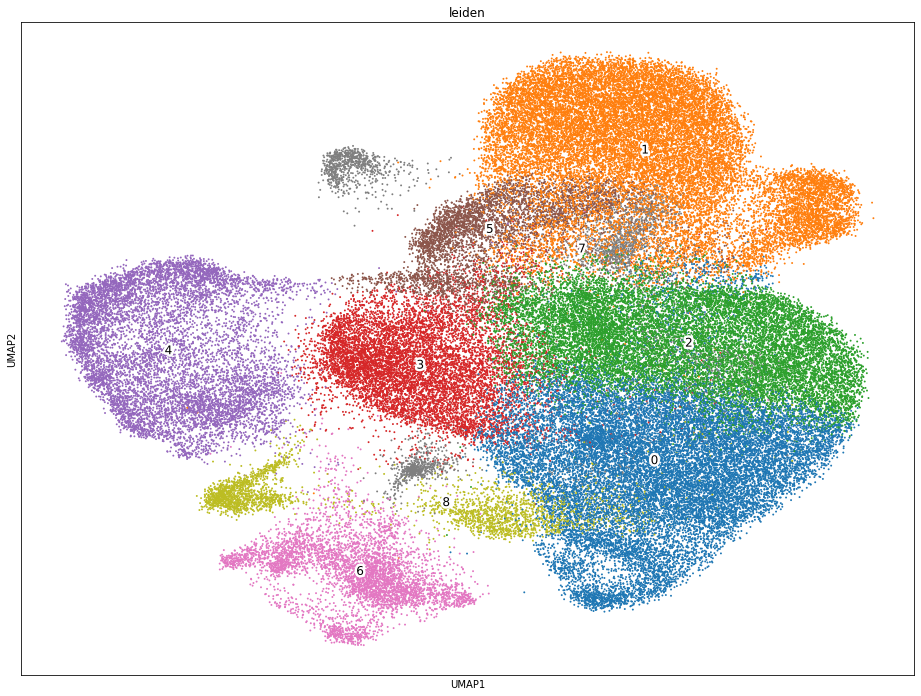

In [12]:
ax = sc.pl.umap(
    ds, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [ ]:
ax = sc.pl.umap(
    ds, 
    color="Sample Name", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

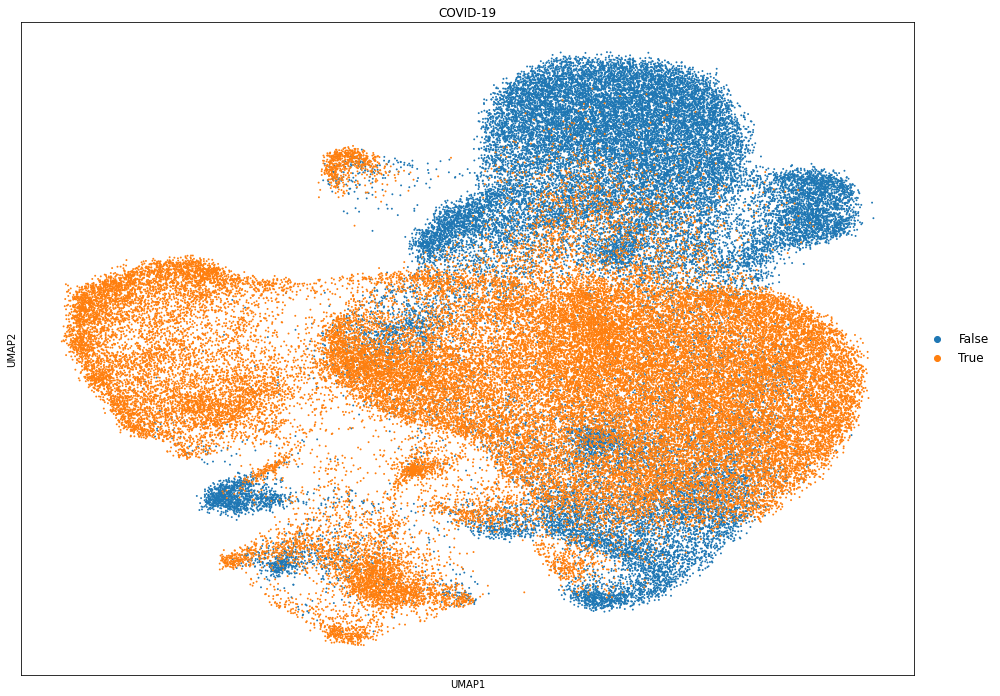

In [17]:
ax = sc.pl.umap(
    ds, 
    color="COVID-19", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

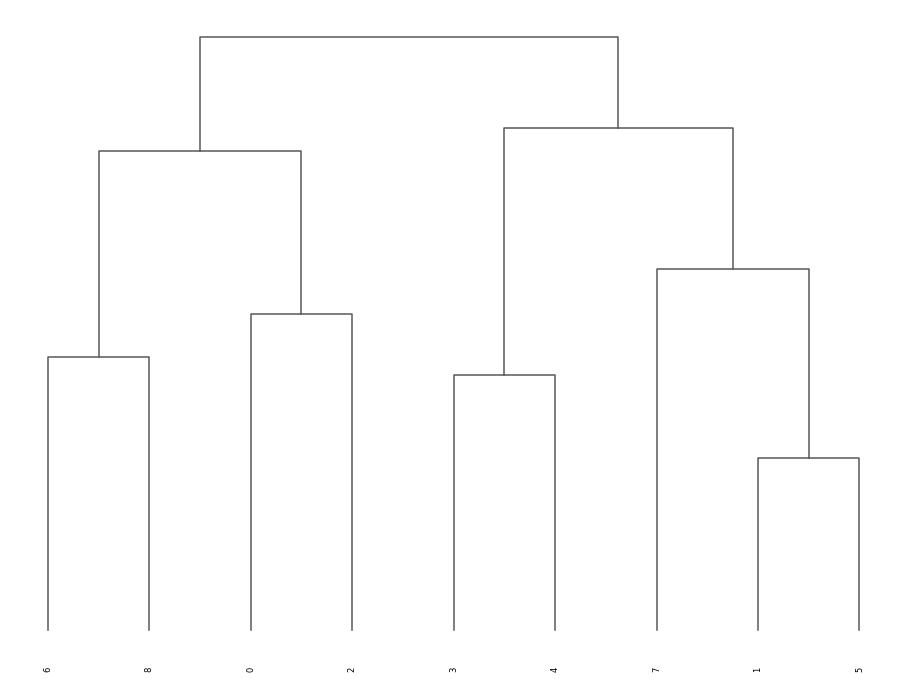

In [18]:
sc.tl.dendrogram(ds, groupby="leiden")
sc.pl.dendrogram(ds, groupby="leiden")

In [19]:
sc.tl.rank_genes_groups(ds, "leiden", method="wilcoxon", n_genes=0)
markers = sc_utils.get_markers(ds, "leiden")

## Marker genes for clusters

In [20]:
markers.groupby("cluster").head(20)

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
0        0.000000e+00   2.128709  0.950773  0.458256   0.000000e+00       0   
1        0.000000e+00   2.921749  0.904459  0.347051   0.000000e+00       0   
2        0.000000e+00   2.909279  0.866045  0.330088   0.000000e+00       0   
3        0.000000e+00   2.718405  0.856268  0.342449   0.000000e+00       0   
4        0.000000e+00   2.465118  0.839974  0.404077   0.000000e+00       0   
5        0.000000e+00   3.749624  0.760184  0.226274   0.000000e+00       0   
6        0.000000e+00   2.419084  0.823187  0.381745   0.000000e+00       0   
7        0.000000e+00   1.972384  0.893843  0.512907   0.000000e+00       0   
8        0.000000e+00   1.508652  0.893102  0.456294   0.000000e+00       0   
9        0.000000e+00   3.117382  0.719005  0.234932   0.000000e+00       0   
10       0.000000e+00   2.566988  0.796277  0.414093   0.000000e+00       0   
11       0.000000e+00   1.846851  0.845850  0.428135   0.000000e+00       0   
12       0.000000e+00   2.290395  0.783637  0.342434   0.000000e+00       0   
13       0.000000e+00   1.896042  0.827927  0.411983   0.000000e+00       0   
14       0.000000e+00   1.466886  0.855972  0.504425   0.000000e+00       0   
15       0.000000e+00   1.913519  0.807979  0.425436   0.000000e+00       0   
16       0.000000e+00   2.370270  0.764776  0.312107   0.000000e+00       0   
17       0.000000e+00   1.400327  0.906730  0.593592   0.000000e+00       0   
18       0.000000e+00   3.454821  0.630721  0.165914   0.000000e+00       0   
19       0.000000e+00   2.571408  0.739051  0.315485   0.000000e+00       0   
26214    0.000000e+00   3.740781  0.991470  0.350529   0.000000e+00       1   
26215    0.000000e+00   5.643631  0.916558  0.166713   0.000000e+00       1   
26216    0.000000e+00   3.855847  0.972002  0.305797   0.000000e+00       1   
26217    0.000000e+00   3.758719  0.958304  0.252272   0.000000e+00       1   
26218    0.000000e+00   3.839016  0.951079  0.205837   0.000000e+00       1   
26219    0.000000e+00   3.135736  0.963723  0.405567   0.000000e+00       1   
26220    0.000000e+00   2.668365  0.981335  0.427250   0.000000e+00       1   
26221    0.000000e+00   2.312037  0.996688  0.547881   0.000000e+00       1   
26222    0.000000e+00   2.511522  0.984295  0.477619   0.000000e+00       1   
26223    0.000000e+00   3.559090  0.937230  0.320111   0.000000e+00       1   
26224    0.000000e+00   3.585991  0.915855  0.182568   0.000000e+00       1   
26225    0.000000e+00   3.340044  0.982439  0.455628   0.000000e+00       1   
26226    0.000000e+00   2.302660  0.977772  0.502562   0.000000e+00       1   
26227    0.000000e+00   3.265598  0.928500  0.230545   0.000000e+00       1   
26228    0.000000e+00   4.476863  0.848620  0.108182   0.000000e+00       1   
26229    0.000000e+00   4.098019  0.854240  0.117783   0.000000e+00       1   
26230    0.000000e+00   2.983463  0.942097  0.365973   0.000000e+00       1   
26231    0.000000e+00   3.420521  0.941796  0.446731   0.000000e+00       1   
26232    0.000000e+00   3.099992  0.864977  0.329404   0.000000e+00       1   
26233    0.000000e+00   2.668406  0.984195  0.468973   0.000000e+00       1   
52428    0.000000e+00   2.288946  0.952679  0.548058   0.000000e+00       2   
52429    0.000000e+00   2.608960  0.905154  0.461269   0.000000e+00       2   
52430    0.000000e+00   3.239305  0.791474  0.240172   0.000000e+00       2   
52431    0.000000e+00   1.755690  0.921607  0.563929   0.000000e+00       2   
52432    0.000000e+00   2.341226  0.857357  0.435853   0.000000e+00       2   
52433    0.000000e+00   2.945571  0.814251  0.489589   0.000000e+00       2   
52434    0.000000e+00   1.613559  0.927862  0.569370   0.000000e+00       2   
52435    0.000000e+00   1.730578  0.883601  0.537708   0.000000e+00       2   
52436    0.000000e+00   2.119013  0.830364  0.422408   0.000000e+00       2   
52437    0.000000e+00   2.027877  0.800245  0.394756   0.000000e+0

## Violin plot for a collection of immune marker genes

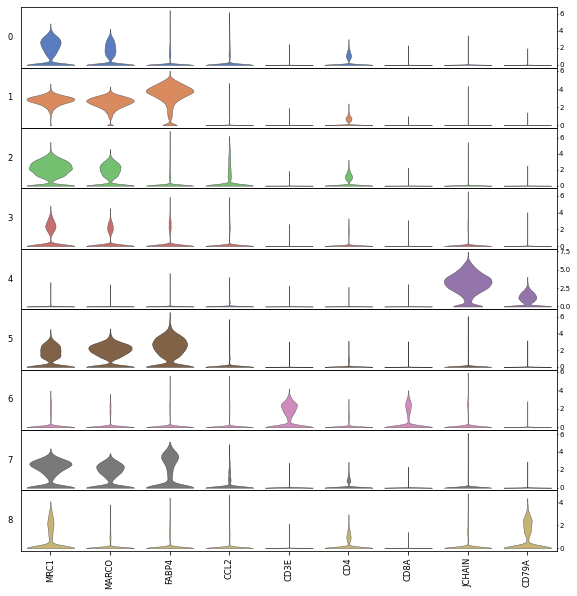

In [23]:
genes = [
    "MRC1", "MARCO", "FABP4", "CCL2", "CD3E", "CD4", "CD8A", "JCHAIN", "CD79A"
]
ax = sc.pl.stacked_violin(
    ds,
    genes,
    groupby="leiden",
    rotation=90,
    figsize=(10, 10),
    show=False
);

## Name clusters

Clusters 1, 2 & 6 are strange

In [38]:
names = pd.Series([
    "MoAM-1",
    "TRAM-1",
    "MoAM-2",
    "MoAM-3",
    "Plasma cells",
    "TRAM-2",
    "T cells",
    "MoAM-4",
    "B cells"
])

In [39]:
ds.obs["cluster"] = names[ds.obs.leiden.astype(int)].values

... storing 'cluster' as categorical


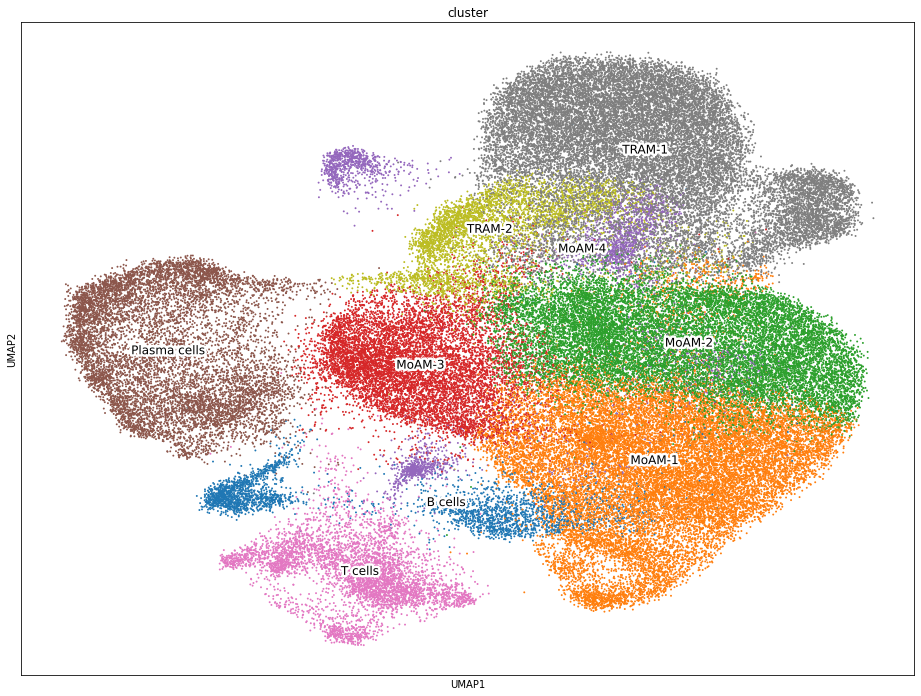

In [40]:
ax = sc.pl.umap(
    ds, 
    color="cluster", 
    size=15, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

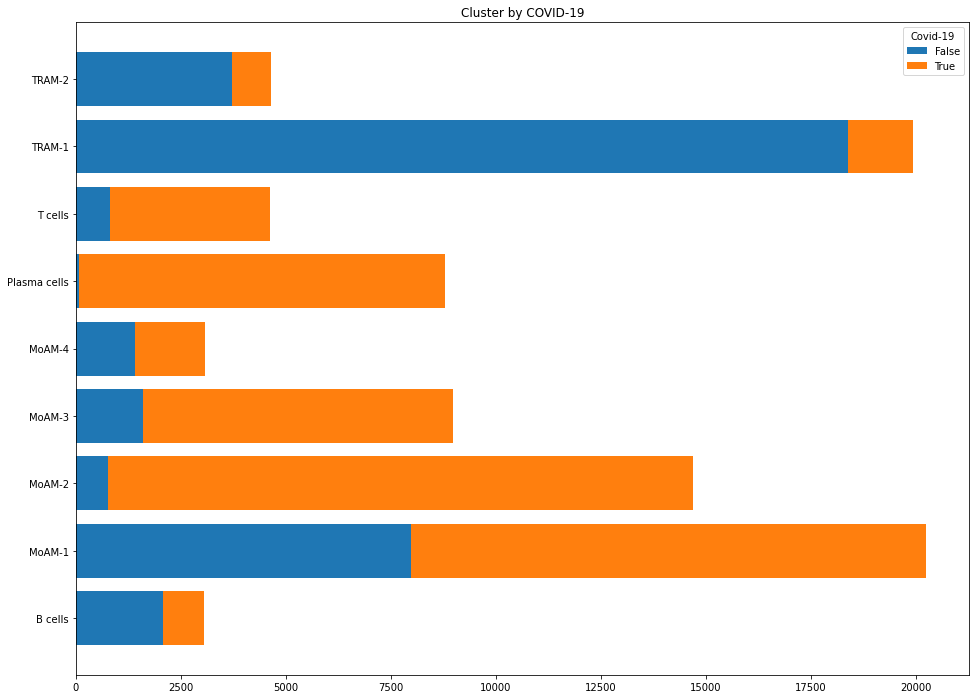

In [41]:
sc_utils.plot_composition(ds, "cluster", "COVID-19")

`TRAM`s are from non-COVID patients, while `MoAM`s, `T cells` and `Plasma cells` are from COVID patients

In [ ]:
sc_utils.plot_composition(ds, "cluster", "Sample Name")

## Doublets

In [6]:
dbl_thresholds = {
    "Sample_1": 0.22,
    "Sample_2": 0.3,
    "Sample_3": 0.35,
    "Sample_4": 0.37,
    "Sample_5": 0.4,
    "Sample_6": 0.25,
    "Sample_7": 0.26,
    "Sample_8": 0.41,
    "Sample_9": 0.38,
    "Sample_10": 0.25,
    "Sample_11": 0.4,
    "Sample_12": 0.37,
    "Sample_13": 0.34,
    "Sample_14": 0.38,
    "Sample_15": 0.33,
    "Sample_16": 0.4,
    "Sample_17": 0.38,
    "Sample_18": 0.39,
    "Sample_19": 0.4,
    "Sample_20": 0.4,
    "Sample_21": 0.28,
    "Sample_22": 0.28
}

In [ ]:
doublets = []
for sample, threshold in dbl_thresholds.items():
    batch_num = ds.obs.batch.loc[ds.obs["orig.ident"] == sample].values[0]
    scores = pd.read_csv(f"doublets/{sample}_doublets.csv", index_col=0)
    sample_doublets = "0_" + scores["0"].loc[scores.doublet > threshold].str.replace("\d+$", "") + batch_num
    doublets.append(sample_doublets)
    print(f"{sample} has {sample_doublets.size}")
doublets = pd.concat(doublets)
doublets.shape

In [8]:
ds.obs["doublet"] = False
ds.obs.doublet[ds.obs_names.isin(doublets)] = True
ds.obs.doublet = ds.obs.doublet.astype("category")
ds.obs.doublet.value_counts()

/projects/b1038/tools/pyenv/versions/3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    87563
True       484
Name: doublet, dtype: int64

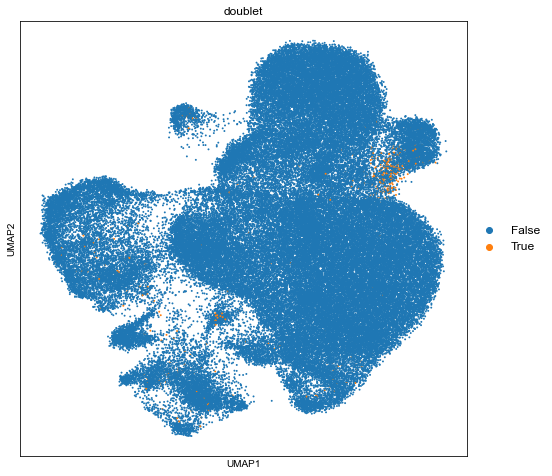

In [32]:
ax = sc.pl.umap(
    ds, 
    color="doublet", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5,
    cmap="YlOrRd"
)

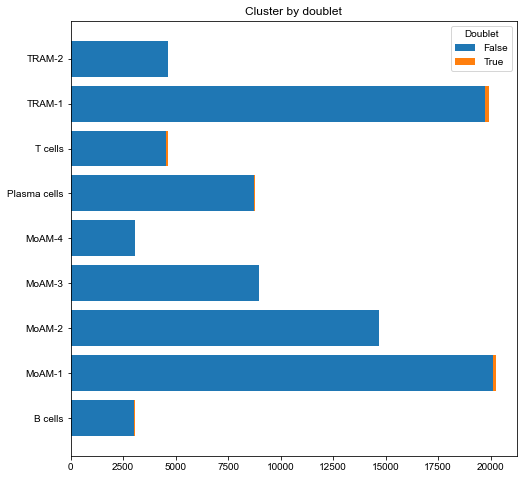

In [33]:
sc_utils.plot_composition(ds, "cluster", "doublet")

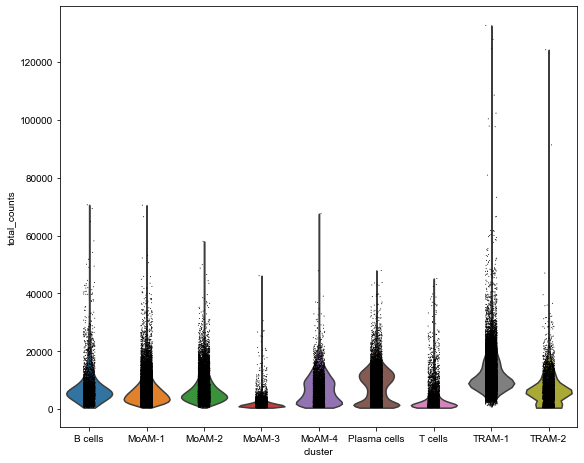

In [36]:
sc.pl.violin(ds, "total_counts", "cluster")

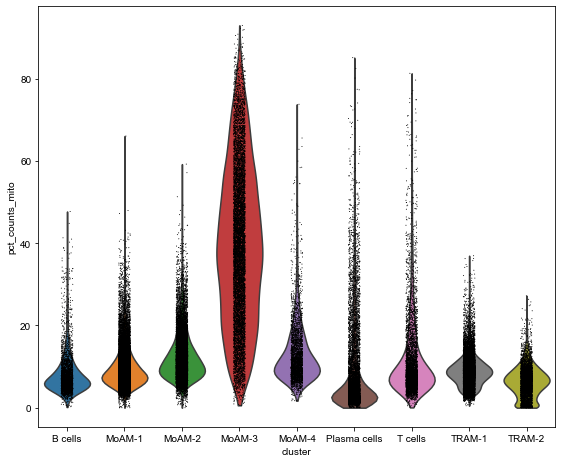

In [37]:
sc.pl.violin(ds, "pct_counts_mito", "cluster")

## Reprocess without doublets and low-q cells

In [9]:
ds2 = ds.raw.to_adata()

In [10]:
ds2 = ds2[~ds2.obs.doublet.astype(bool), :]
ds2 = ds2[ds2.obs.cluster != "MoAM-3", :]

Trying to set attribute `.var` of view, copying.


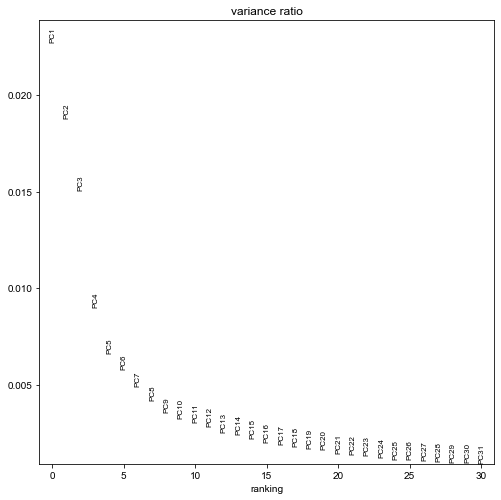

In [11]:
sc.pp.highly_variable_genes(ds2, n_top_genes=3000, batch_key="orig.ident")
ds2.raw = ds2

sc.pp.scale(ds2)
sc.tl.pca(ds2, svd_solver="arpack")
sc.pl.pca_variance_ratio(ds2)

In [12]:
bbknn.bbknn(ds2, neighbors_within_batch=int(50 / ds2.obs.batch.unique().size), n_pcs=25)

In [23]:
sc.tl.leiden(ds2, resolution=0.6)
sc.tl.umap(ds2)

In [24]:
sc.tl.leiden(ds2, resolution=1.2, key_added="leiden_deep")

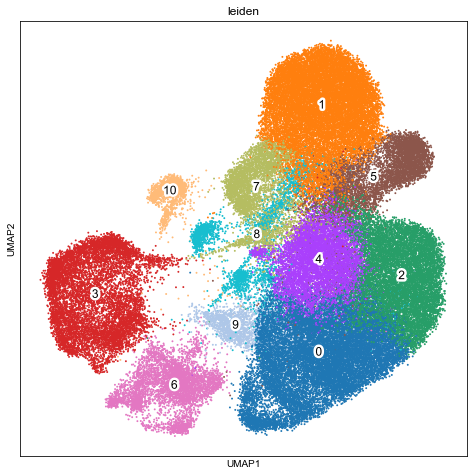

In [25]:
ax = sc.pl.umap(
    ds2, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

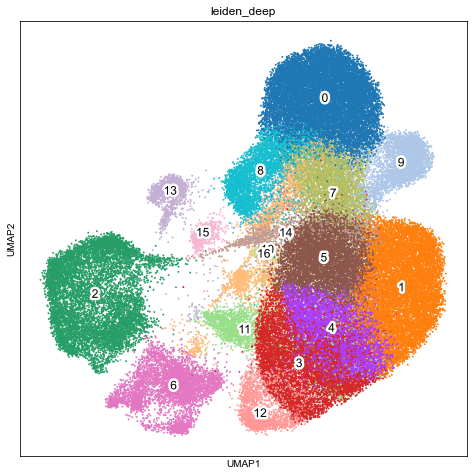

In [26]:
ax = sc.pl.umap(
    ds2, 
    color="leiden_deep", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [28]:
ds2.obs.leiden = ds2.obs.leiden.astype(str)
ds2.obs.loc[ds2.obs.leiden_deep == "15", "leiden"] = "11"

... storing 'leiden' as categorical


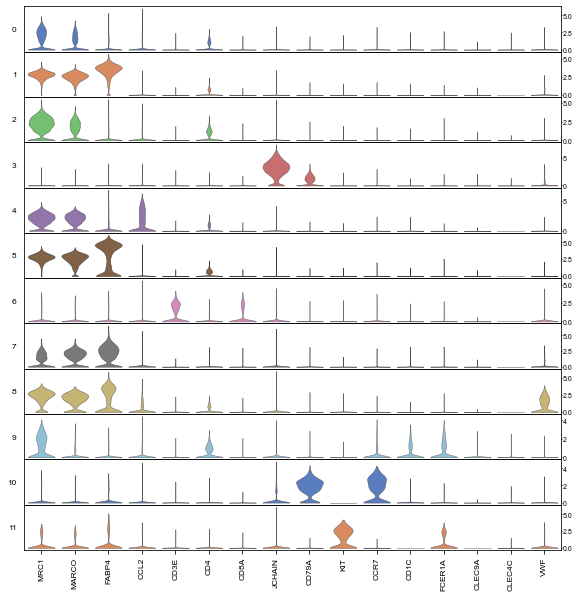

In [29]:
genes = [
    "MRC1", "MARCO", "FABP4", "CCL2", "CD3E", "CD4", "CD8A", 
    "JCHAIN", "CD79A", "KIT", "CCR7", "CD1C", "FCER1A", "CLEC9A", "CLEC4C",
    "VWF"
]
ax = sc.pl.stacked_violin(
    ds2,
    genes,
    groupby="leiden",
    rotation=90,
    figsize=(10, 10),
    show=False
);

Cluster 8 is doublets with Endothelial cells: _VWF_

In [30]:
ds2 = ds2[ds2.obs.leiden != "8", :].copy()

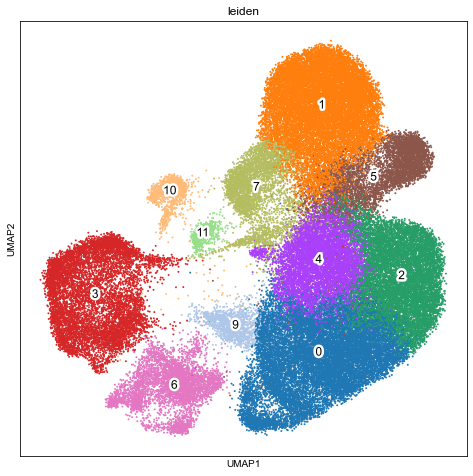

In [31]:
ax = sc.pl.umap(
    ds2, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

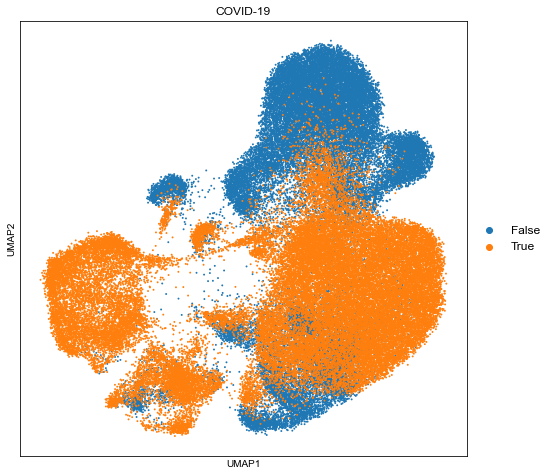

In [32]:
ax = sc.pl.umap(
    ds2, 
    color="COVID-19", 
    size=15, 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [33]:
sc.tl.rank_genes_groups(ds2, "leiden", method="wilcoxon", n_genes=0)
markers = sc_utils.get_markers(ds2, "leiden")

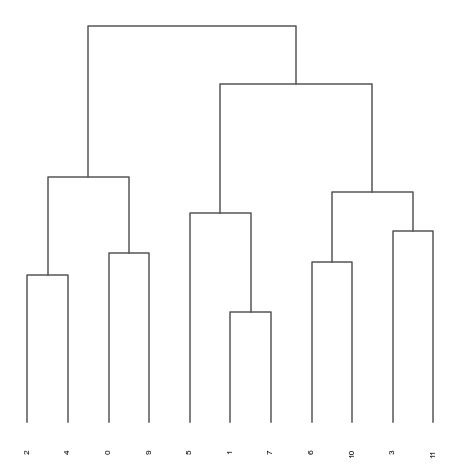

In [34]:
sc.tl.dendrogram(ds2, groupby="leiden")
sc.pl.dendrogram(ds2, groupby="leiden")

In [35]:
markers.groupby("cluster").head(10)

p_val  avg_logFC     pct.1     pct.2      p_val_adj cluster  \
0        0.000000e+00   3.215560  0.933161  0.328440   0.000000e+00       0   
1        0.000000e+00   2.053538  0.955115  0.436094   0.000000e+00       0   
2        0.000000e+00   1.691571  0.915517  0.442656   0.000000e+00       0   
3        0.000000e+00   3.018332  0.868276  0.326986   0.000000e+00       0   
4        0.000000e+00   2.432262  0.835230  0.393378   0.000000e+00       0   
5        0.000000e+00   2.653830  0.856379  0.336862   0.000000e+00       0   
6        0.000000e+00   2.356469  0.830402  0.418084   0.000000e+00       0   
7        0.000000e+00   1.855256  0.891667  0.518500   0.000000e+00       0   
8        0.000000e+00   3.708937  0.758793  0.237342   0.000000e+00       0   
9        0.000000e+00   1.577927  0.877299  0.491460   0.000000e+00       0   
26214    0.000000e+00   3.597914  0.994597  0.378775   0.000000e+00       1   
26215    0.000000e+00   3.812441  0.981798  0.337504   0.000000e+00       1   
26216    0.000000e+00   3.440242  0.949125  0.339012   0.000000e+00       1   
26217    0.000000e+00   4.986351  0.912786  0.108058   0.000000e+00       1   
26218    0.000000e+00   5.153411  0.957744  0.187158   0.000000e+00       1   
26219    0.000000e+00   4.102598  0.926550  0.174647   0.000000e+00       1   
26220    0.000000e+00   3.552030  0.967649  0.290444   0.000000e+00       1   
26221    0.000000e+00   2.150934  0.996077  0.568360   0.000000e+00       1   
26222    0.000000e+00   2.341037  0.983599  0.495917   0.000000e+00       1   
26223    0.000000e+00   2.423331  0.978518  0.453022   0.000000e+00       1   
52428    0.000000e+00   3.757900  0.917206  0.478307   0.000000e+00       2   
52429    0.000000e+00   3.729942  0.882435  0.257380   0.000000e+00       2   
52430    0.000000e+00   2.623976  0.923583  0.481977   0.000000e+00       2   
52431    0.000000e+00   2.116593  0.958454  0.561078   0.000000e+00       2   
52432    0.000000e+00   2.761118  0.918800  0.365731   0.000000e+00       2   
52433    0.000000e+00   2.888839  0.890007  0.315608   0.000000e+00       2   
52434    0.000000e+00   4.958992  0.716350  0.093914   0.000000e+00       2   
52435    0.000000e+00   1.660711  0.924978  0.576252   0.000000e+00       2   
52436    0.000000e+00   3.656752  0.714556  0.140758   0.000000e+00       2   
52437    0.000000e+00   2.030375  0.820365  0.430155   0.000000e+00       2   
78642    0.000000e+00   9.761972  0.979582  0.087442   0.000000e+00       3   
78643    0.000000e+00  10.053895  0.990250  0.193774   0.000000e+00       3   
78644    0.000000e+00  10.370979  0.969030  0.096098   0.000000e+00       3   
78645    0.000000e+00   9.509859  0.966047  0.072992   0.000000e+00       3   
78646    0.000000e+00   9.006131  0.957903  0.019981   0.000000e+00       3   
78647    0.000000e+00   3.688725  0.945056  0.414917   0.000000e+00       3   
78648    0.000000e+00   8.384217  0.892292  0.033974   0.000000e+00       3   
78649    0.000000e+00   7.575614  0.905483  0.090569   0.000000e+00       3   
78650    0.000000e+00   3.014556  0.915233  0.475493   0.000000e+00       3   
78651    0.000000e+00   8.657826  0.797889  0.019302   0.000000e+00       3   
104856   0.000000e+00   5.459040  0.760903  0.128458   0.000000e+00       4   
104857   0.000000e+00   1.562521  0.941293  0.599777   0.000000e+00       4   
104858   0.000000e+00   2.607990  0.882586  0.470333   0.000000e+00       4   
104859   0.000000e+00   1.990888  0.929399  0.583557   0.000000e+00       4   
104860   0.000000e+00   1.470061  0.926959  0.634246   0.000000e+00       4   
104861   0.000000e+00   1.583156  0.916438  0.587344   0.000000e+00       4   
104862   0.000000e+00   1.448566  0.956542  0.653653   0.000000e+00       4   
104863   0.000000e+00   1.639975  0.889600  0.526466   0.000000e+00       4   
104864   0.000000e+00   1.792393  0.902562  0.573511   0.000000e+00       4   
104865   0.000000e+00   2.274920  0.785605  0.380073   0.000000e+0

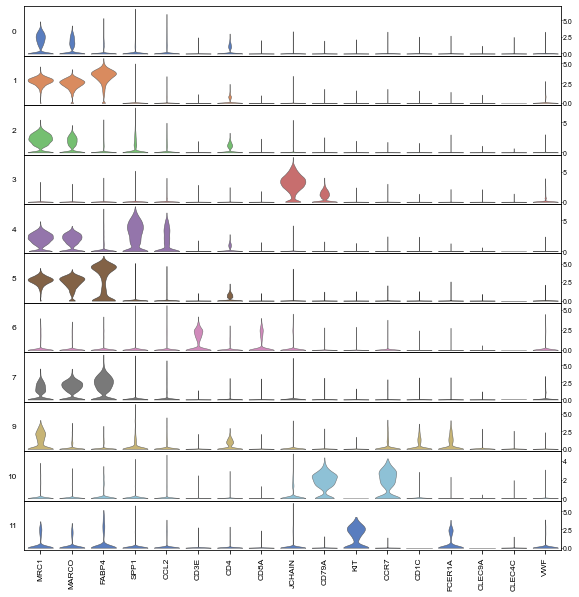

In [37]:
genes = [
    "MRC1", "MARCO", "FABP4", "SPP1", "CCL2", "CD3E", "CD4", "CD8A", 
    "JCHAIN", "CD79A", "KIT", "CCR7", "CD1C", "FCER1A", "CLEC9A", "CLEC4C",
    "VWF"
]
ax = sc.pl.stacked_violin(
    ds2,
    genes,
    groupby="leiden",
    rotation=90,
    figsize=(10, 10),
    show=False
);

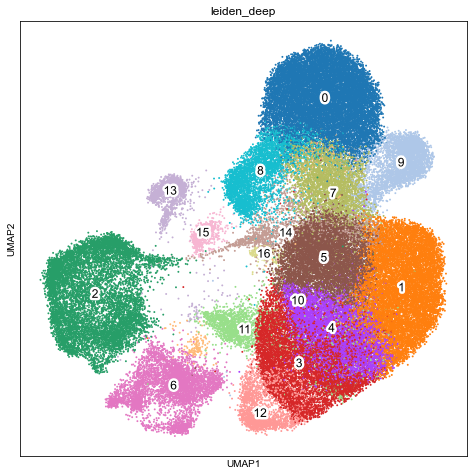

In [9]:
ax = sc.pl.umap(
    ds2, 
    color="leiden_deep", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [10]:
ds2.obs.leiden = ds2.obs.leiden.astype(str)
ds2.obs.loc[ds2.obs.leiden_deep == "16", "leiden"] = "12"

... storing 'leiden' as categorical


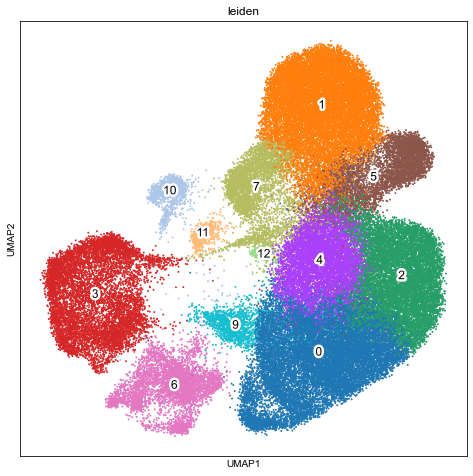

In [11]:
ax = sc.pl.umap(
    ds2, 
    color="leiden", 
    size=15, 
    legend_loc="on data", 
    show=False, 
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5
)

In [12]:
names = pd.Series([
    "MoAM-1",
    "TRAM-1",
    "MoAM-2",
    "Plasma cells",
    "MoAM-3",
    "TRAM-2",
    "T cells",
    "TRAM-3",
    "Empty",
    "DCs",
    "B cells",
    "Mast cells",
    "MoAM-4"
])

In [13]:
ds2.obs["cluster"] = names[ds2.obs.leiden.astype(int)].values

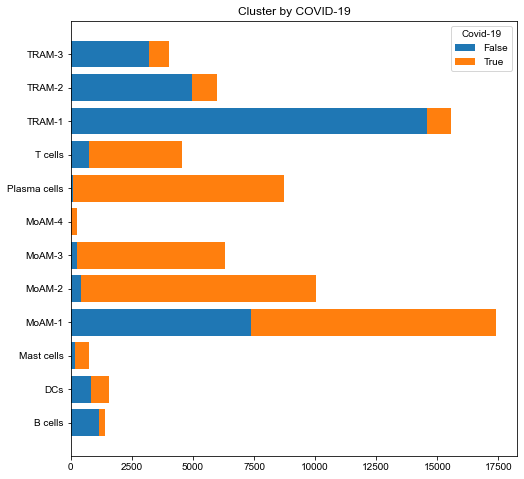

In [14]:
sc_utils.plot_composition(ds2, "cluster", "COVID-19")

... storing 'cluster' as categorical


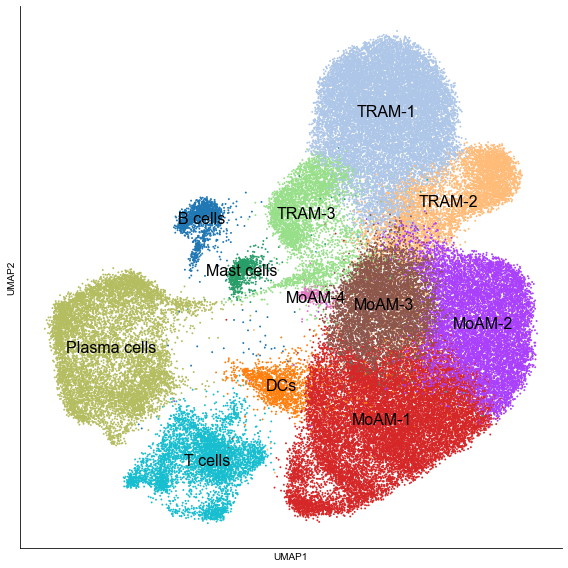

In [15]:
ax = sc.pl.umap(
    ds2, 
    color="cluster", 
    size=15, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=16, 
    legend_fontweight="normal",
#     legend_fontoutline=5
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
ax.figure.tight_layout()
ax.figure.savefig("plots/11immune-umap.pdf")

In [ ]:
ax = sc.pl.umap(
    ds2, 
    color="Sample Name", 
    size=15, 
    show=False, 
#     legend_loc="on data",
    legend_fontsize=18, 
    legend_fontweight="normal",
#     legend_fontoutline=5
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, frameon=False, title="Patient", title_fontsize=14,
          fontsize=16, loc="upper left", labelspacing=0.2)#, bbox_to_anchor=(0.4, 1))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
ax.figure.tight_layout()
ax.figure.savefig("plots/15immune-patient.pdf")

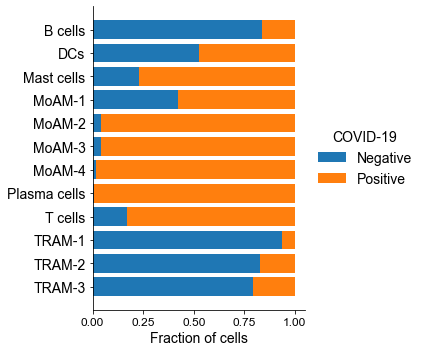

In [17]:
left = np.zeros(len(ds2.obs.cluster.unique()))
fig, ax = plt.subplots(figsize=(6, 5))
totals = ds2.obs.cluster.value_counts().sort_index()
for s in sorted(ds2.obs["COVID-19"].astype(str).unique()):
    cnt = ds2.obs.cluster[ds2.obs["COVID-19"] == s].value_counts().sort_index() / totals
    ax.barh(list(reversed(cnt.index)), list(reversed(cnt.values)), left=left, label=s)
    left += list(reversed(cnt))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Negative", "Positive"], title="COVID-19", 
          loc="center left", bbox_to_anchor=(1, 0.5),
          frameon=False, fontsize=14, title_fontsize=14)
# ax.set_title("Cluster by patient", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="x", labelsize=12)#, rotation=45)
ax.tick_params(axis="y", labelsize=14)
# ax.set_xticklabels([
#     "CD4 T cells", "Tregs", "CD8 T cells", 
#     "Proliferating CD4 T cells", "Proliferating CD8 T cells",
#     "MoAM1", "MoAM2", "MoAM3", "TRAM1", "TRAM2"
# ], ha="right")
ax.set_xlabel("Fraction of cells", fontsize=14)
ax.figure.tight_layout()
ax.figure.savefig("plots/14immune-covid-clusters.pdf")

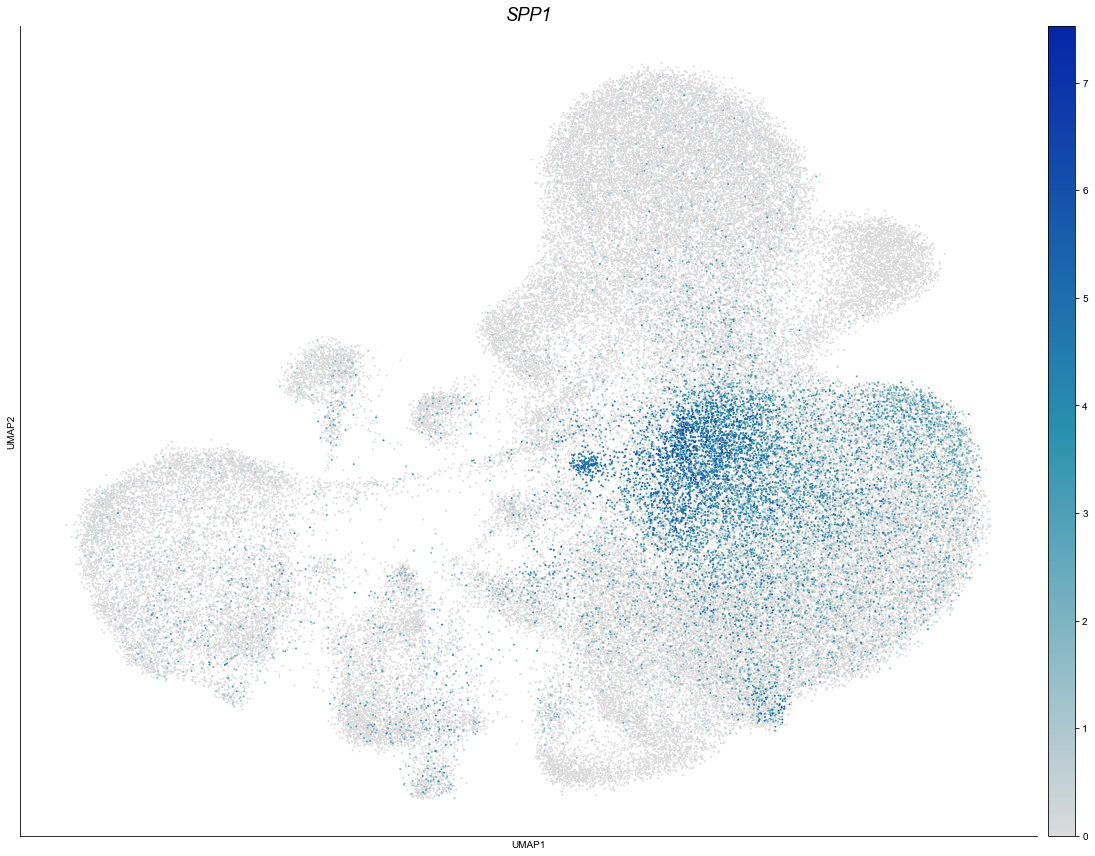

In [10]:
ax = sc.pl.umap(
    ds3, 
    color="SPP1", 
    size=15, 
    show=False, 
    legend_loc="on data",
    legend_fontsize=12, 
    legend_fontweight="normal",
    legend_fontoutline=5,
    cmap=sc_utils.expr_colormap()
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("SPP1", fontstyle="italic", fontsize=18)
ax.figure.tight_layout()
ax.figure.savefig("plots/12immune_spp1.pdf")

## Plot genes mentioned in the paper

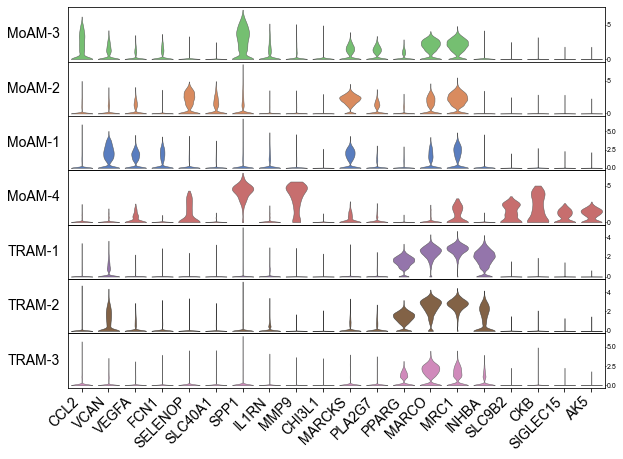

In [7]:
macs = ds2.obs.cluster[ds2.obs.cluster.astype(str).str.match("^MoAM|TRAM")].unique()
subset = ds2[ds2.obs.cluster.isin(macs), :]

paper_genes = [
    "CCL2", "VCAN", "VEGFA", "FCN1", "SELENOP", "SLC40A1",
    "SPP1", "IL1RN", "MMP9", "CHI3L1", "MARCKS", "PLA2G7",
    "PPARG", "MARCO", "MRC1", "INHBA",
    "SLC9B2", "CKB", "SIGLEC15", "AK5"
]

ax = sc.pl.stacked_violin(
    subset,
    paper_genes,
    groupby="cluster",
    rotation=90,
    figsize=(len(paper_genes) * 0.5, 7),
    show=False,
    order=["MoAM-3", "MoAM-2", "MoAM-1", "MoAM-4", "TRAM-1", "TRAM-2", "TRAM-3"]
)
for a in ax:
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    p = a.get_position()
    p.x0 += 0.1
    p.x1 += 0.1
    a.set_position(p)
moam1p = ax[6].get_position()
ax[6].set_position(ax[4].get_position())
ax[4].set_position(moam1p)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontsize=14, ha="right")
ax[0].figure.savefig("plots/13immune-violins.pdf")

In [6]:
sc.tl.rank_genes_groups(ds2, "cluster", method="wilcoxon", n_genes=0)
markers = sc_utils.get_markers(ds2, "cluster")

## DEGs between COVID+ and COVID– per cluster

In [6]:
ds4 = ds3.copy()

In [7]:
ds4.obs["COVID-19"] = ds4.obs["COVID-19"].astype(str).map({"True": "COVID+", "False": "COVID-"}).astype("category").values

In [8]:
result = []
for cl in ds4.obs.cluster.unique():
    ds_slice = ds4[ds4.obs.cluster == cl, :]
    cnt = ds_slice.obs["COVID-19"].value_counts()[0] / ds_slice.shape[0]
    if cnt < 0.05 or cnt > 0.95:
        continue
    sc.tl.rank_genes_groups(ds_slice, groupby="COVID-19", method="wilcoxon")
    markers = sc_utils.get_markers(ds_slice, "COVID-19")
    markers.loc[markers.cluster == "COVID-", "avg_logFC"] *= -1
    markers["COVID"] = markers.cluster
    markers.cluster = cl
    markers = markers.loc[:, ["cluster", "COVID", "gene", "avg_logFC", "pct.1", "pct.2", "p_val_adj"]]
    result.append(markers.sort_values("avg_logFC"))

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


In [9]:
all_degs = pd.concat(result, ignore_index=True)
all_degs.sort_values(["cluster", "avg_logFC"]).to_csv("12immune-covid-markers.csv")

In [26]:
ds2.write_h5ad("../data/02dataset/12immune.h5ad")

In [55]:
markers["cluster"] = names[markers.cluster.astype(int)].values

In [7]:
markers.to_csv("../data/02dataset/12immune-markers.csv")